In [19]:
#loading libraries
import mediapipe as mp
import cv2
import subprocess
from matplotlib import pyplot as plt
import numpy as np
import cvlib as cv
import sys
##########################################
BG_COLOR = (192, 192, 192) # gray
pose_estimator = mp.solutions.pose     #pose estimator
drawer = mp.solutions.drawing_utils    #drawing class for the key points
mp_drawing_styles = mp.solutions.drawing_styles #drawing style
pose = pose_estimator.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5, static_image_mode=True,enable_segmentation=True,)
padding = 20
hip_girth_in_real = 15.4
upper_arm_length_in_real = 12
fore_arm_length_in_real = 11.1
sleeve_length_in_real = 23.1
shoulder_length_in_real = 15.8
insteam_in_real = 33.5
###########################################

#function to measure distance between to points in an image 
def distance(x1,y1,x2,y2):
    dist = ((x2-x1)**2 + (y2-y1)**2)**0.5
    return dist

#getting the two point of the strip from the image
#############################################
length_strip = 20 #length of the strip in cm
img_ms_path = 'imageMark.jpeg'
p1=subprocess.Popen([sys.executable, "drawline.py",'--input_image',img_ms_path],stdout=subprocess.PIPE)
line = p1.communicate()[0]
line = line.decode('utf-8')
p1.kill()
dist = float(line)
print(dist)

99.04544411531506


['male', 'female'] [0.9951663  0.00483375]
male


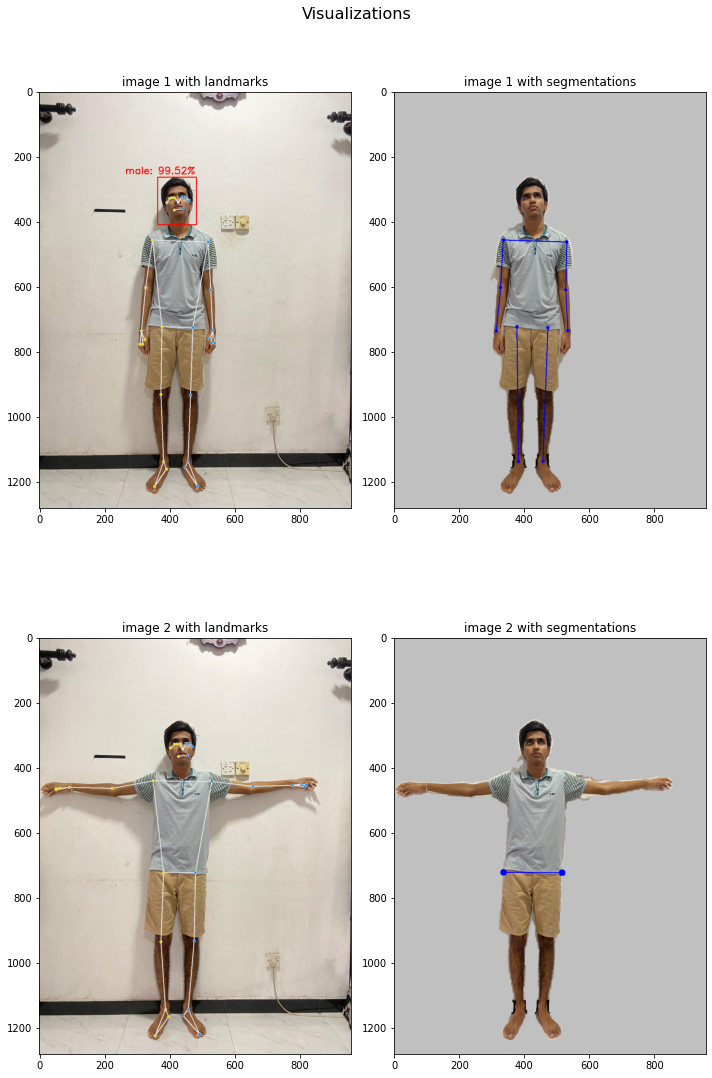

In [20]:
#processing images with standingat attention
###################################################################################################
path1 =  'imageAttention.jpeg'
imgtest1 = cv2.imread(path1)    #reading the image
face, confidence = cv.detect_face(imgtest1)        #face detection
image_width1 = imgtest1.shape[1]    #get width
image_height1 = imgtest1.shape[0]   #get height   
imgtest1 = cv2.cvtColor(imgtest1, cv2.COLOR_BGR2RGB)    #convert the BGR image to RGB image
imgtest1.flags.writeable = False
imgseg1 = imgtest1.copy()
results1 = pose.process(imgtest1)
#draw body landmarks
drawer.draw_landmarks(
    imgtest1,
    results1.pose_landmarks,
    pose_estimator.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

for i in face:
    (x, y) = max(0, i[0]-padding), max(0, i[1]-padding)
    (x2, y2) = min(image_width1-1, i[2]+padding), min(image_height1-1,i[3]+padding)
    cv2.rectangle(imgtest1, (x, y), (x2, y2), (255, 0, 0), 2)
    crop = np.copy(imgtest1[y:y2, x:x2])
    (label, confidence) = cv.detect_gender(crop)
    print(label,confidence)
    idx = np.argmax(confidence)
    gender = label[idx]
    label = "{}: {:.2f}%".format(gender, confidence[idx] * 100)
    Y = y - 10 if y -10 > 10 else y + 10
    cv2.putText(imgtest1, label, (y, Y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
#gender = 'male'
print(gender)
#getting the coordinates for all the landmarks
x_LWRIST=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_WRIST].x * image_width1)
y_LWRIST=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_WRIST].y * image_height1)
x_LELBOW=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_ELBOW].x * image_width1)
y_LELBOW=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_ELBOW].y * image_height1)
x_LSHLDR=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_SHOULDER].x * image_width1)
y_LSHLDR=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_SHOULDER].y * image_height1)
x_LHIP=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_HIP].x * image_width1)
y_LHIP=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_HIP].y * image_height1)
x_LKNEE=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_KNEE].x * image_width1)
y_LKNEE=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_KNEE].y * image_height1)
x_LANKLE=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_ANKLE].x * image_width1)
y_LANKLE=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_ANKLE].y * image_height1)


x_RWRIST=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_WRIST].x * image_width1)
y_RWRIST=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_WRIST].y * image_height1)
x_RELBOW=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_ELBOW].x * image_width1)
y_RELBOW=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_ELBOW].y * image_height1)
x_RSHLDR=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_SHOULDER].x * image_width1)
y_RSHLDR=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_SHOULDER].y * image_height1)
x_RHIP=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_HIP].x * image_width1)
y_RHIP=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_HIP].y * image_height1)
x_RKNEE=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_KNEE].x * image_width1)
y_RKNEE=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_KNEE].y * image_height1)
x_RANKLE=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_ANKLE].x * image_width1)
y_RANKLE=int(results1.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_ANKLE].y * image_height1)

#calculating the fore arm length from the image (average of right and left)
fore_arm_length = (distance(x_LWRIST,y_LWRIST,x_LELBOW,y_LELBOW) + distance(x_RWRIST,y_RWRIST,x_RELBOW,y_RELBOW))*0.5
#calculating the insteam from the image (average of right and left)
insteam = (distance(x_LHIP,y_LHIP,x_LANKLE,y_LANKLE) + distance(x_RHIP,y_RHIP,x_RANKLE,y_RANKLE))*0.5

#creating the segmentation
condition1 = np.stack((results1.segmentation_mask,) * 3, axis=-1) > 0.1
bg_image1 = np.zeros(imgseg1.shape, dtype=np.uint8)
bg_image1[:] = BG_COLOR
annotated_image1 = np.where(condition1, imgseg1, bg_image1)

#Left shoulder adjustment
lshoulderlist = list(condition1[y_LSHLDR,:,1])
for idxls in range(x_LSHLDR,image_width1+1):
    if lshoulderlist[idxls] == False:
        new_x_lshldr = idxls-1
        break
#Right shoulder adjustment
rshoulderlist = list(condition1[y_RSHLDR,:,1])
for idxrs in range(x_RSHLDR,0,-1):
    if rshoulderlist[idxrs] == False:
        new_x_rshldr = idxrs+1
        break

x_LSHLDR = (new_x_lshldr+x_LSHLDR)/2
x_RSHLDR = (new_x_rshldr+x_RSHLDR)/2

#calculating the upper arm length from the image (average of right and left)
upper_arm_length = (distance(x_LSHLDR,y_LSHLDR,x_LELBOW,y_LELBOW) + distance(x_RSHLDR,y_RSHLDR,x_RELBOW,y_RELBOW))*0.5
#calculating the sleeve length from the image (average of right and left)
sleeve_length = (distance(x_LSHLDR,y_LSHLDR,x_LWRIST,y_LWRIST) + distance(x_RSHLDR,y_RSHLDR,x_RWRIST,y_RWRIST))*0.5
#calculating the shoulder length from the image 
shoulder_length = distance(x_LSHLDR,y_LSHLDR,x_RSHLDR,y_RSHLDR) 

radius = 5

#drawing the landmarks with adjusted values
cv2.circle(annotated_image1,(int(x_LSHLDR),int(y_LSHLDR)),radius,(0,0,255),-1)
cv2.circle(annotated_image1,(int(x_RSHLDR),int(y_RSHLDR)),radius,(0,0,255),-1)
cv2.line(annotated_image1,(int(x_LSHLDR),int(y_LSHLDR)),(int(x_RSHLDR),int(y_RSHLDR)),(0,0,255),2)
cv2.circle(annotated_image1,(int(x_LELBOW),int(y_LELBOW)),radius,(0,0,255),-1)
cv2.circle(annotated_image1,(int(x_RELBOW),int(y_RELBOW)),radius,(0,0,255),-1)
cv2.line(annotated_image1,(int(x_LSHLDR),int(y_LSHLDR)),(int(x_LELBOW),int(y_LELBOW)),(0,0,255),2)
cv2.line(annotated_image1,(int(x_RSHLDR),int(y_RSHLDR)),(int(x_RELBOW),int(y_RELBOW)),(0,0,255),2)
cv2.circle(annotated_image1,(int(x_LWRIST),int(y_LWRIST)),radius,(0,0,255),-1)
cv2.circle(annotated_image1,(int(x_RWRIST),int(y_RWRIST)),radius,(0,0,255),-1)
cv2.line(annotated_image1,(int(x_LWRIST),int(y_LWRIST)),(int(x_LELBOW),int(y_LELBOW)),(0,0,255),2)
cv2.line(annotated_image1,(int(x_RWRIST),int(y_RWRIST)),(int(x_RELBOW),int(y_RELBOW)),(0,0,255),2)
cv2.circle(annotated_image1,(int(x_LHIP),int(y_LHIP)),radius,(0,0,255),-1)
cv2.circle(annotated_image1,(int(x_RHIP),int(y_RHIP)),radius,(0,0,255),-1)
cv2.circle(annotated_image1,(int(x_LANKLE),int(y_LANKLE)),radius,(0,0,255),-1)
cv2.circle(annotated_image1,(int(x_RANKLE),int(y_RANKLE)),radius,(0,0,255),-1)
cv2.line(annotated_image1,(int(x_LHIP),int(y_LHIP)),(int(x_LANKLE),int(y_LANKLE)),(0,0,255),2)
cv2.line(annotated_image1,(int(x_RHIP),int(y_RHIP)),(int(x_RANKLE),int(y_RANKLE)),(0,0,255),2)

#processing image with arms stretched
######################################################################################################
path2 = 'imageStretched.jpeg'
imgtest2 = cv2.imread(path2)    #reading the image
image_width2 = imgtest2.shape[1]    #get width
image_height2 = imgtest2.shape[0]   #get height
imgtest2 = cv2.cvtColor(imgtest2, cv2.COLOR_BGR2RGB)    #convert the BGR image to RGB image
imgtest2.flags.writeable = False
imgseg2 = imgtest2.copy()
results2 = pose.process(imgtest2)

#draw body landmarks
drawer.draw_landmarks(
    imgtest2,
    results2.pose_landmarks,
    pose_estimator.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())


x_LHIP=int(results2.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_HIP].x * image_width2)
y_LHIP=int(results2.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_HIP].y * image_height2)
x_RHIP=int(results2.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_HIP].x * image_width2)
y_RHIP=int(results2.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_HIP].y * image_height2)
# x_LSHLDR=int(results2.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_SHOULDER].x * image_width2)
# y_LSHLDR=int(results2.pose_landmarks.landmark[pose_estimator.PoseLandmark.LEFT_SHOULDER].y * image_height2)
# x_RSHLDR=int(results2.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_SHOULDER].x * image_width2)
# y_RSHLDR=int(results2.pose_landmarks.landmark[pose_estimator.PoseLandmark.RIGHT_SHOULDER].y * image_height2)

condition2 = np.stack((results2.segmentation_mask,) * 3, axis=-1) > 0.1
bg_image2 = np.zeros(imgseg2.shape, dtype=np.uint8)
bg_image2[:] = BG_COLOR
annotated_image2 = np.where(condition2, imgseg2, bg_image2)

#Left hip adjustment
lhiplist = list(condition2[y_LHIP,:,1])
for idxls in range(x_LHIP,image_width2+1):
    if lhiplist[idxls] == False:
        new_x_lhip = idxls-1
        break
#Right hip adjustment
rhiplist = list(condition2[y_RHIP,:,1])
for idxrs in range(x_RHIP,0,-1):
    if rhiplist[idxrs] == False:
        new_x_rhip = idxrs+1
        break

#getting the coordinates for all the landmarks
x_LHIP = new_x_lhip
x_RHIP = new_x_rhip

#calculating the hip length from the image 
hip_girth = distance(x_LHIP,y_LHIP,x_RHIP,y_RHIP)
#calculating the shoulder length from the image 
shoulder_length = distance(x_LSHLDR,y_LSHLDR,x_RSHLDR,y_RSHLDR) 

#drawing the landmarks with adjusted values
cv2.circle(annotated_image2,(int(x_LHIP),int(y_LHIP)),10,(0,0,255),-1)
cv2.circle(annotated_image2,(int(x_RHIP),int(y_RHIP)),10,(0,0,255),-1)
cv2.line(annotated_image2,(int(x_LHIP),int(y_LHIP)),(int(x_RHIP),int(y_RHIP)),(0,0,255),2)

#visualizing all the images
f, ax = plt.subplots(2, 2, figsize=(10,16))

ax[0,0].imshow(imgtest1)
ax[0,1].imshow(annotated_image1)
ax[1,0].imshow(imgtest2)
ax[1,1].imshow(annotated_image2)

ax[0,0].set_title('image 1 with landmarks')
ax[0,1].set_title('image 1 with segmentations')
ax[1,0].set_title('image 2 with landmarks')
ax[1,1].set_title('image 2 with segmentations')

title = 'Visualizations'
f.suptitle(title, fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
#function to convert cm to inches
def convert_cm2inch(x):
    return x*0.393700787

#measurements in cm
hip_girth_cm = hip_girth*(20/dist)
upper_arm_length_cm = upper_arm_length*(20/dist)
fore_arm_length_cm = fore_arm_length*(20/dist)
sleeve_length_cm = sleeve_length*(20/dist)
shoulder_length_cm = shoulder_length*(20/dist)
insteam_cm = insteam*(20/dist)

hip_girth_in = convert_cm2inch(hip_girth_cm)
upper_arm_length_in = convert_cm2inch(upper_arm_length_cm)
fore_arm_length_in = convert_cm2inch(fore_arm_length_cm)
sleeve_length_in = convert_cm2inch(sleeve_length_cm)
shoulder_length_in = convert_cm2inch(shoulder_length_cm)
insteam_in = convert_cm2inch(insteam_cm)

listcm = [shoulder_length_cm,sleeve_length_cm,upper_arm_length_cm,fore_arm_length_cm,hip_girth_cm,insteam_cm]
listin = [shoulder_length_in,sleeve_length_in,upper_arm_length_in,fore_arm_length_in,hip_girth_in,insteam_in]
listinReal = [shoulder_length_in_real,sleeve_length_in_real,upper_arm_length_in_real,fore_arm_length_in_real,hip_girth_in_real,insteam_in_real]
listname = ['shoulder_length','sleeve_length','upper_arm_length','fore_arm_length','hip_girth','insteam']

error = 0
for idx, name in enumerate(listname):
    error = (listin[idx]-listinReal[idx])**2
    print('{0} - {1:.2f} inches ({2:.2f} cm)'.format(name,listin[idx],listcm[idx]))
error = error/len(listname)

shoulder_length - 15.55 inches (39.50 cm)
sleeve_length - 21.93 inches (55.71 cm)
upper_arm_length - 11.66 inches (29.61 cm)
fore_arm_length - 10.29 inches (26.13 cm)
hip_girth - 14.31 inches (36.35 cm)
insteam - 32.77 inches (83.22 cm)


In [17]:
if gender == 'male':

    #shoulder
    if shoulder_length_in <= 15:
        shoulder_size = 'XS'
    elif shoulder_length_in <= 15.5:
        shoulder_size = 'S'
    elif shoulder_length_in <= 16.5:
        shoulder_size = 'M'
    elif shoulder_length_in <= 17.5:
        shoulder_size = 'L'
    elif shoulder_length_in <= 18:
        shoulder_size = 'XL'
    elif shoulder_length_in <= 19.5:
        shoulder_size = 'XXL'
    else:
        shoulder_size = 'XXL'
    
    #sleeve length
    sleeve_length_in = sleeve_length_in * 1.05
    if sleeve_length_in <= 24.75:
        sleeve_size = 'XS'
    elif sleeve_length_in <= 25:
        sleeve_size = 'S'
    elif sleeve_length_in <= 25.5:
        sleeve_size = 'M'
    elif sleeve_length_in <= 26:
        sleeve_size = 'L'
    elif sleeve_length_in <= 26.25:
        sleeve_size = 'XL'
    elif sleeve_length_in <= 26.75:
        sleeve_size = 'XXL'
    else:
        sleeve_size = 'XXL'

    #hip length
    hip_girth_in = 2* hip_girth_in * 1.1
    if hip_girth_in <= 35:
        hip_size = 'XS'
    elif hip_girth_in <= 37:
        hip_size = 'S'
    elif hip_girth_in <= 39:
        hip_size = 'M'
    elif hip_girth_in <= 41:
        hip_size = 'L'
    elif hip_girth_in <= 43:
        hip_size = 'XL'
    elif hip_girth_in <= 45:
        hip_size = 'XXL'
    else:
        hip_size = 'XXL'

    #instream length
    insteam_in = insteam_in*1.05
    if insteam_in <= 33:
        instream_size = 'XS'
    elif insteam_in <= 34.5:
        instream_size = 'S'
    elif insteam_in <= 36:
        instream_size = 'M'
    elif insteam_in <= 38:
        instream_size = 'L'
    elif insteam_in <= 39.5:
        instream_size = 'XL'
    elif insteam_in <= 41:
        instream_size = 'XXL'
    else:
        instream_size = 'XXL'

elif gender == 'female':

    #shoulder
    if shoulder_length_in <= 13.5:
        shoulder_size = 'XS'
    elif shoulder_length_in <= 14.6:
        shoulder_size = 'S'
    elif shoulder_length_in <= 15:
        shoulder_size = 'M'
    elif shoulder_length_in <= 15.4:
        shoulder_size = 'L'
    elif shoulder_length_in <= 15.7:
        shoulder_size = 'XL'
    elif shoulder_length_in <= 16.2:
        shoulder_size = 'XXL'
    else:
        shoulder_size = 'XXL'
    
    #sleeve length
    sleeve_length_in = sleeve_length_in * 1.05
    if sleeve_length_in <= 22.7:
        sleeve_size = 'XS'
    elif sleeve_length_in <= 23.2:
        sleeve_size = 'S'
    elif sleeve_length_in <= 23.7:
        sleeve_size = 'M'
    elif sleeve_length_in <= 24.2:
        sleeve_size = 'L'
    elif sleeve_length_in <= 24.8:
        sleeve_size = 'XL'
    elif sleeve_length_in <= 25.2:
        sleeve_size = 'XXL'
    else:
        sleeve_size = 'XXL'

    #hip length
    hip_girth_in = 2* hip_girth_in * 1.1
    if hip_girth_in <= 29:
        hip_size = 'XS'
    elif hip_girth_in <= 33:
        hip_size = 'S'
    elif hip_girth_in <= 37:
        hip_size = 'M'
    elif hip_girth_in <= 41:
        hip_size = 'L'
    elif hip_girth_in <= 45:
        hip_size = 'XL'
    elif hip_girth_in <= 49:
        hip_size = 'XXL'
    else:
        hip_size = 'XXL'

    #instream length
    insteam_in = insteam_in*1.05
    if insteam_in <= 27.5:
        instream_size = 'XS'
    elif insteam_in <= 27.9:
        instream_size = 'S'
    elif insteam_in <= 28.5:
        instream_size = 'M'
    elif insteam_in <= 29.1:
        instream_size = 'L'
    elif insteam_in <= 29.5:
        instream_size = 'XL'
    elif insteam_in <= 29.9:
        instream_size = 'XXL'
    else:
        instream_size = 'XXL'

print('{0} - {1}'.format('shoulder_size',shoulder_size))
print('{0} - {1}'.format('sleeve_size',sleeve_size))
print('{0} - {1}'.format('hip_size',hip_size))
print('{0} - {1}'.format('instream_size',instream_size))

shoulder_size - M
sleeve_size - XS
hip_size - XS
instream_size - S


In [22]:
print('{0} - {1}'.format('Upper Body Size',shoulder_size))
print('{0} - {1}'.format('Lower Body Size',hip_size))
print('{0} - {1}'.format('Mean Squared Error',error))

Upper Body Size - M
Lower Body Size - XS
Mean Squared Error - 0.08986618394237811
